# Hierarchical Agglomerative Clustering (HAC) trong Python

- Nguyễn Hữu Vũ  
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh



## Sử dụng HAC để Phân loại Khách Hàng
- Dataset: Shop_Customers.csv


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
dataset = pd.read_csv('Shop_Customers.csv')


In [2]:
dataset.shape

(200, 5)

In [3]:
X = dataset.iloc[:, [3,4]].values  
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
X.shape

(200, 2)

# 1)Tìm số clusters tối ưu bằng  dendrogram
Using Dendrogram to find the optimal number of clusters' profiles
* The vertical axis of the dendrogram represents the euclidean distances or dissimilarity between clusters. 
* The horizontal axis represents all possible clusters compounds.   
* Based on the respective analysis objective, dissimilarity threshold in terms of euclidean distances can be set across the dendrogram to define the number of clusters that meet the required threshold.  
* The optimal number of clusters can be found by first locating the highest vertical axis without cutting the horizontal axis. Then count the total number of vertical axis that meet this criteria. In this case study, there are 5 axes. 

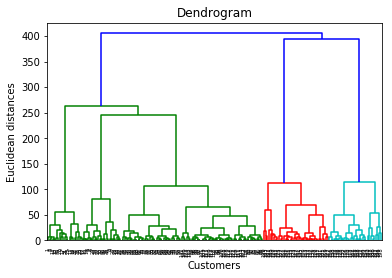

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## 2)  Sử dụng class `AgglomerativeClustering`

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [8]:
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## 3) Visualising the clusters:


Text(0,0.5,'Spending Ratings (1-100)')

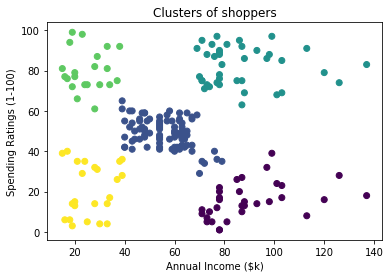

In [9]:
plt.scatter(X[:,0], X[:, 1], c= y_hc ) #colors được xác định bằng cluster
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Ratings (1-100)')

##### Có thể xác định đặc điểm từng nhóm và vẽ chi tiết với nhiều chú thích hơn

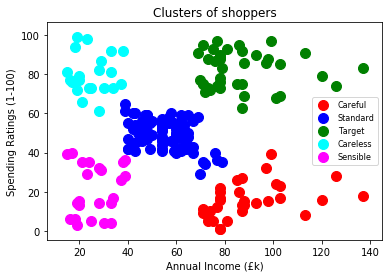

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1], s = 100, c = 'red', label = 'Careful')  
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3,1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4,1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income (£k)')
plt.ylabel('Spending Ratings (1-100)')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=8)
plt.show()

## 4)  Clustering with non-optimal number of clusters

In [11]:
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 8, 3, 4, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3, 4, 3, 4, 3, 4, 3,
       8, 3, 8, 3, 4, 3, 4, 3, 8, 3, 8, 3, 8, 3, 8, 3, 4, 3, 4, 3, 4, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 7, 1, 7, 1, 1, 7, 7, 1, 7, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 2, 6, 2, 5, 2, 6, 2, 6, 0, 6, 2, 6, 0, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int64)

##### Visualising 

Text(0,0.5,'Spending Ratings (1-100)')

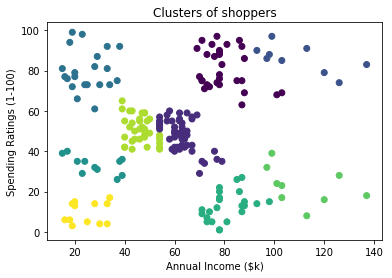

In [12]:
plt.scatter(X[:,0], X[:, 1], c= y_hc ) #colors được xác định bằng cluster
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Ratings (1-100)')